<a href="https://colab.research.google.com/github/sanalpillai/Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/blob/main/Data_Cleaning_Feature_Selection_Modeling_and_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install --upgrade shap
!pip install h2o
!pip install xgboost
!pip install eli5
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=bef92b08668ee6e24e2e4a6c1a8ed81674b790e589efcdb7d634dcba78c2618b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [61]:
data = pd.read_csv("https://raw.githubusercontent.com/sanalpillai/Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/Dataset/cleaned_data_cirrhosis.csv", index_col=0)

In [62]:
data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [63]:
data.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
ID                                                                           
1      400      D  D-penicillamine  21464   F       Y            Y       Y   
2     4500      C  D-penicillamine  20617   F       N            Y       Y   
3     1012      D  D-penicillamine  25594   M       N            N       N   
4     1925      D  D-penicillamine  19994   F       N            Y       Y   
5     1504     CL          Placebo  13918   F       N            Y       Y   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
ID                                                                    
1      Y       14.5        261.0     2.60   156.0    1718.0  137.95   
2      N        1.1        302.0     4.14    54.0    7394.8  113.52   
3      S        1.4        176.0     3.48   210.0     516.0   96.10   
4      S        1.8        244.0     2.54    64.0    6121.8   60.63   
5      N        3.4        279.0     3.53   143.0     671.0  113.15   

    Tryglicerides  Platelets  Prothrombin  Stage  
ID                                                
1           172.0      190.0         12.2    4.0  
2            88.0      221.0         10.6    3.0  
3            55.0      151.0         12.0    4.0  
4            92.0      183.0         10.3    4.0  
5            72.0      136.0         10.9    3.0

In [64]:
# Replace 'CL' with 'C' in the 'Status' column
data['Status'] = data['Status'].replace({'CL': 'C'})
data['Edema'] = data['Edema'].replace({'S': 'Y'})

In [65]:
data.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
ID                                                                           
1      400      D  D-penicillamine  21464   F       Y            Y       Y   
2     4500      C  D-penicillamine  20617   F       N            Y       Y   
3     1012      D  D-penicillamine  25594   M       N            N       N   
4     1925      D  D-penicillamine  19994   F       N            Y       Y   
5     1504      C          Placebo  13918   F       N            Y       Y   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
ID                                                                    
1      Y       14.5        261.0     2.60   156.0    1718.0  137.95   
2      N        1.1        302.0     4.14    54.0    7394.8  113.52   
3      Y        1.4        176.0     3.48   210.0     516.0   96.10   
4      Y        1.8        244.0     2.54    64.0    6121.8   60.63   
5      N        3.4        279.0     3.53   143.0     671.0  113.15   

    Tryglicerides  Platelets  Prothrombin  Stage  
ID                                                
1           172.0      190.0         12.2    4.0  
2            88.0      221.0         10.6    3.0  
3            55.0      151.0         12.0    4.0  
4            92.0      183.0         10.3    4.0  
5            72.0      136.0         10.9    3.0

In [66]:
import pandas as pd

# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Series([], dtype: int64)


In [67]:
data.corr()

<ipython-input-67-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.125934  -0.403953    -0.099322  0.430829 -0.295723   
Age           -0.125934  1.000000   0.002362    -0.145054 -0.182350  0.034519   
Bilirubin     -0.403953  0.002362   1.000000     0.336882 -0.314177  0.403761   
Cholesterol   -0.099322 -0.145054   0.336882     1.000000 -0.043022  0.145910   
Albumin        0.430829 -0.182350  -0.314177    -0.043022  1.000000 -0.209024   
Copper        -0.295723  0.034519   0.403761     0.145910 -0.209024  1.000000   
Alk_Phos       0.152368 -0.060708   0.104675     0.157995 -0.070010  0.207349   
SGOT          -0.187930 -0.139050   0.392112     0.347222 -0.180947  0.298923   
Tryglicerides -0.111453  0.002323   0.370330     0.291750 -0.068509  0.292236   
Platelets      0.147495 -0.145948  -0.013347     0.158641  0.156384 -0.040523   
Prothrombin   -0.110685  0.113916   0.312007    -0.027259 -0.198405  0.182494   
Stage         -0.362013  0.187852   0.200314     0.009930 -0.302190  0.232149   

               Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  \
N_Days         0.152368 -0.187930      -0.111453   0.147495    -0.110685   
Age           -0.060708 -0.139050       0.002323  -0.145948     0.113916   
Bilirubin      0.104675  0.392112       0.370330  -0.013347     0.312007   
Cholesterol    0.157995  0.347222       0.291750   0.158641    -0.027259   
Albumin       -0.070010 -0.180947      -0.068509   0.156384    -0.198405   
Copper         0.207349  0.298923       0.292236  -0.040523     0.182494   
Alk_Phos       1.000000  0.122071       0.186250   0.133398     0.073408   
SGOT           0.122071  1.000000       0.130853  -0.094383     0.094550   
Tryglicerides  0.186250  0.130853       1.000000   0.088806     0.014831   
Platelets      0.133398 -0.094383       0.088806   1.000000    -0.154617   
Prothrombin    0.073408  0.094550       0.014831  -0.154617     1.000000   
Stage          0.037905  0.143568       0.099879  -0.240671     0.205981   

                  Stage  
N_Days        -0.362013  
Age            0.187852  
Bilirubin      0.200314  
Cholesterol    0.009930  
Albumin       -0.302190  
Copper         0.232149  
Alk_Phos       0.037905  
SGOT           0.143568  
Tryglicerides  0.099879  
Platelets     -0.240671  
Prothrombin    0.205981  
Stage          1.000000

<Axes: >

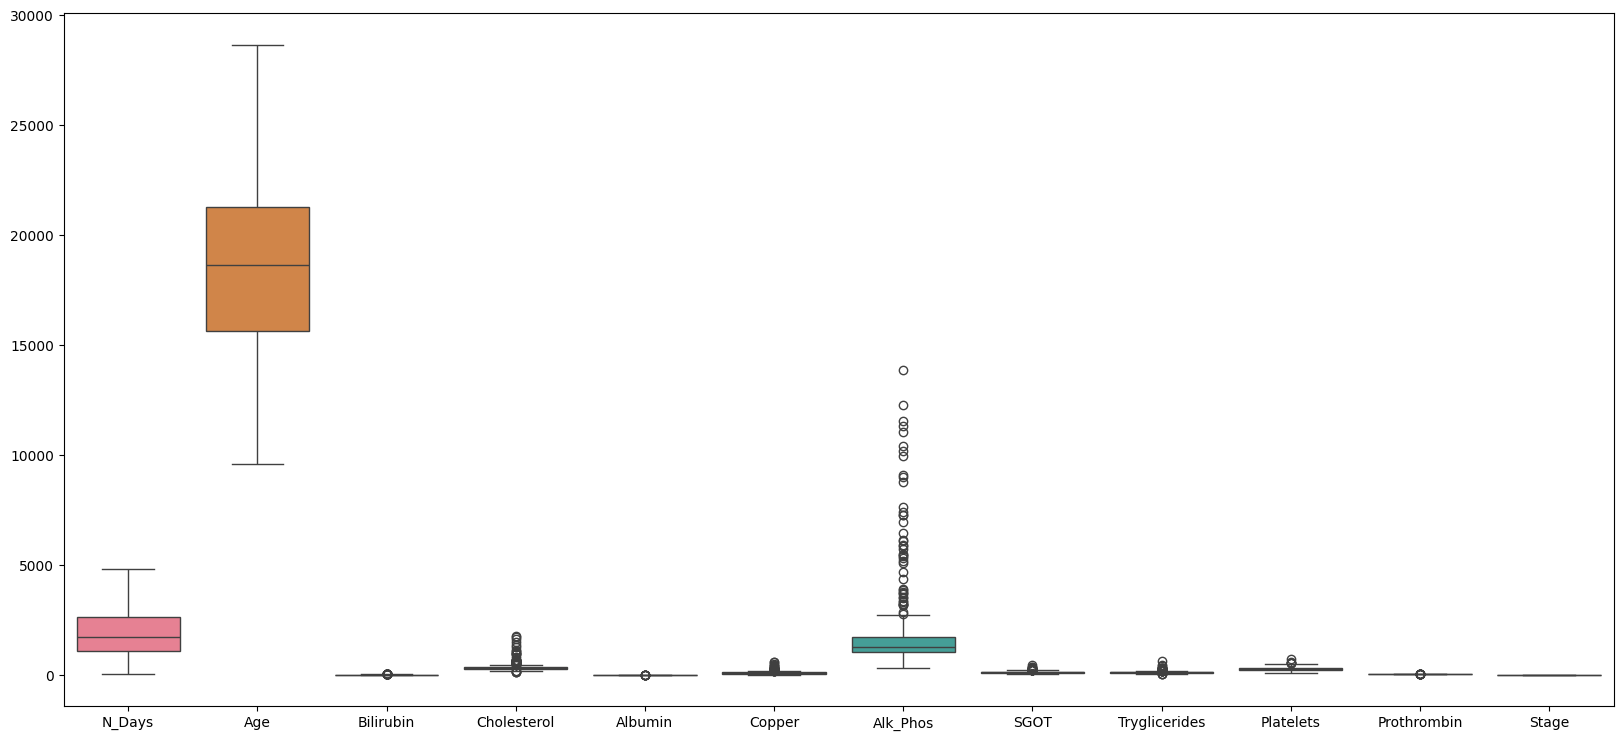

In [68]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

In [69]:
#Making categories to 0 & 1
data["Status"] = data["Status"].map({"D": 0, "C": 1})
data["Drug"] = data["Drug"].map({"D-penicillamine": 0, "Placebo": 1})
data["Sex"] = data["Sex"].map({"F": 0, "M": 1})
data["Ascites"] = data["Ascites"].map({"N": 0, "Y": 1})
data["Hepatomegaly"] = data["Hepatomegaly"].map({"N": 0, "Y": 1})
data["Spiders"] = data["Spiders"].map({"N": 0, "Y": 1})
data["Edema"] = data["Edema"].map({"N": 0, "Y": 1})

# Viewing data
data.head()

N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
ID                                                                            
1      400       0     0  21464    0        1             1        1      1   
2     4500       1     0  20617    0        0             1        1      0   
3     1012       0     0  25594    1        0             0        0      1   
4     1925       0     0  19994    0        0             1        1      1   
5     1504       1     1  13918    0        0             1        1      0   

    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
ID                                                                             
1        14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
2         1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
3         1.4        176.0     3.48   210.0     516.0   96.10           55.0   
4         1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
5         3.4        279.0     3.53   143.0     671.0  113.15           72.0   

    Platelets  Prothrombin  Stage  
ID                                 
1       190.0         12.2    4.0  
2       221.0         10.6    3.0  
3       151.0         12.0    4.0  
4       183.0         10.3    4.0  
5       136.0         10.9    3.0

Class Distribution:
1    257
0    161
Name: Status, dtype: int64

Class Proportions:
1    0.614833
0    0.385167
Name: Status, dtype: float64


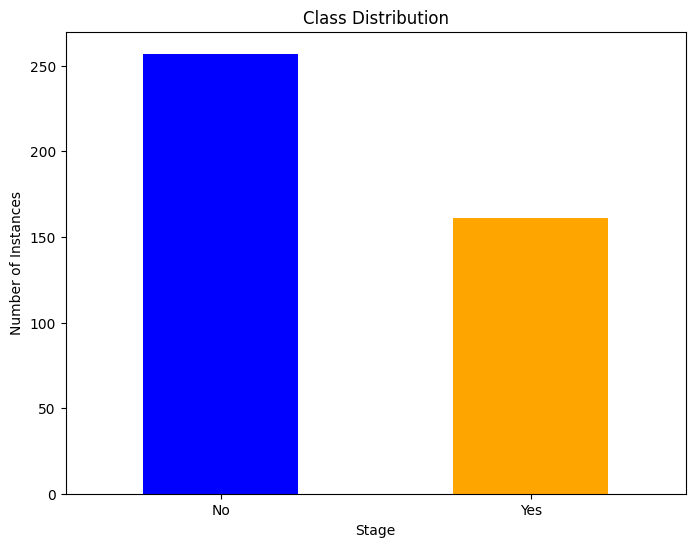

In [70]:
# Count the number of instances for each class
class_counts = data['Status'].value_counts()

# Calculate the proportion of each class label relative to the total number of instances
total_instances = len(data)
class_proportions = class_counts / total_instances

print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Stage')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

Class Distribution after SMOTE:
1    176
0    176
Name: Status, dtype: int64

Class Proportions after SMOTE:
1    0.5
0    0.5
Name: Status, dtype: float64


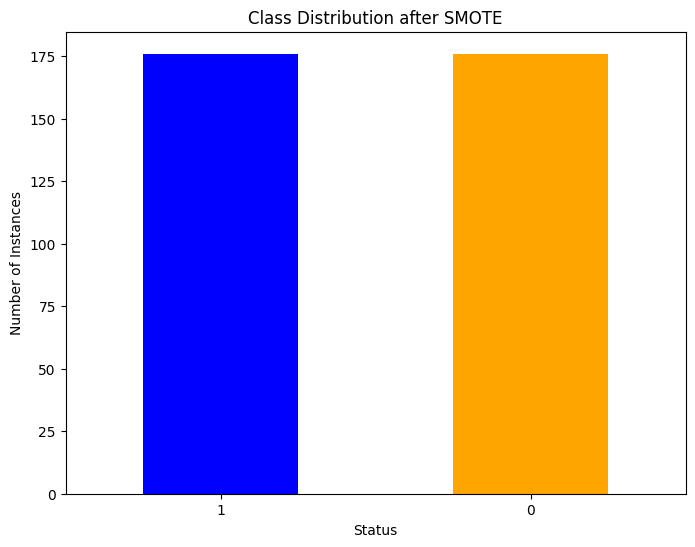

In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the columns of interest
# Replace 'feature_columns' with your actual list of feature column names
feature_columns = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
                   'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                   'Tryglicerides', 'Platelets', 'Prothrombin']  # example feature columns

# Separate input features and target variable
X = data[feature_columns]
y = data['Status']

# Split your data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the SMOTE object
smote = SMOTE(random_state=1)

# Fit the SMOTE object to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count the number of instances for each class after SMOTE
class_counts_smote = pd.Series(y_train_smote).value_counts()

# Calculate the proportion of each class label relative to the total number of instances after SMOTE
total_instances_smote = len(y_train_smote)
class_proportions_smote = class_counts_smote / total_instances_smote

print("Class Distribution after SMOTE:")
print(class_counts_smote)
print("\nClass Proportions after SMOTE:")
print(class_proportions_smote)

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
class_counts_smote.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Status')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], class_counts_smote.index, rotation=0)  # Assuming the class labels are 0 and 1
plt.show()

In [72]:
# Apply one-hot encoding to 'Drug' and any other categorical variables not yet encoded
data = pd.get_dummies(data, columns=['Drug'], drop_first=True)

In [73]:
# Creating binary vaiables
data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create variables to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

# Handling NaNs by filling them with the mean of each column
data = data.fillna(data.mean())

In [74]:
# data after normalizing and feature creation
data.head()

N_Days  Status       Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
ID                                                                           
1   0.937947       0  0.578364    0        1             1        1      1   
2   0.204249       1  0.839597    0        0             1        1      0   
3   0.396298       0  0.545664    1        0             0        0      1   
4   0.307741       0  0.226748    0        0             1        1      1   
5   0.517880       1  0.766481    0        0             1        1      0   

    Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
ID                                                                   
1    0.028881     0.109970  0.813433  0.085616  0.523509  0.202298   
2    0.039711     0.033837  0.567164  0.352740  0.016724  0.161871   
3    0.054152     0.074924  0.216418  0.102740  0.429723  0.079554   
4    0.111913     0.096073  0.585821  0.238014  0.028143  0.201439   
5    0.018051     0.077341  0.753731  0.078767  0.048256  0.154676   

    Tryglicerides  Platelets  Prothrombin     Stage  Drug_1  
ID                                                           
1        0.097345   0.241275     0.177778  0.666667       0  
2        0.038938   0.135053     0.333333  1.000000       0  
3        0.104425   0.183612     0.144444  1.000000       0  
4        0.069027   0.112291     0.211111  0.666667       0  
5        0.053097   0.295940     0.222222  0.666667       1

<Axes: >

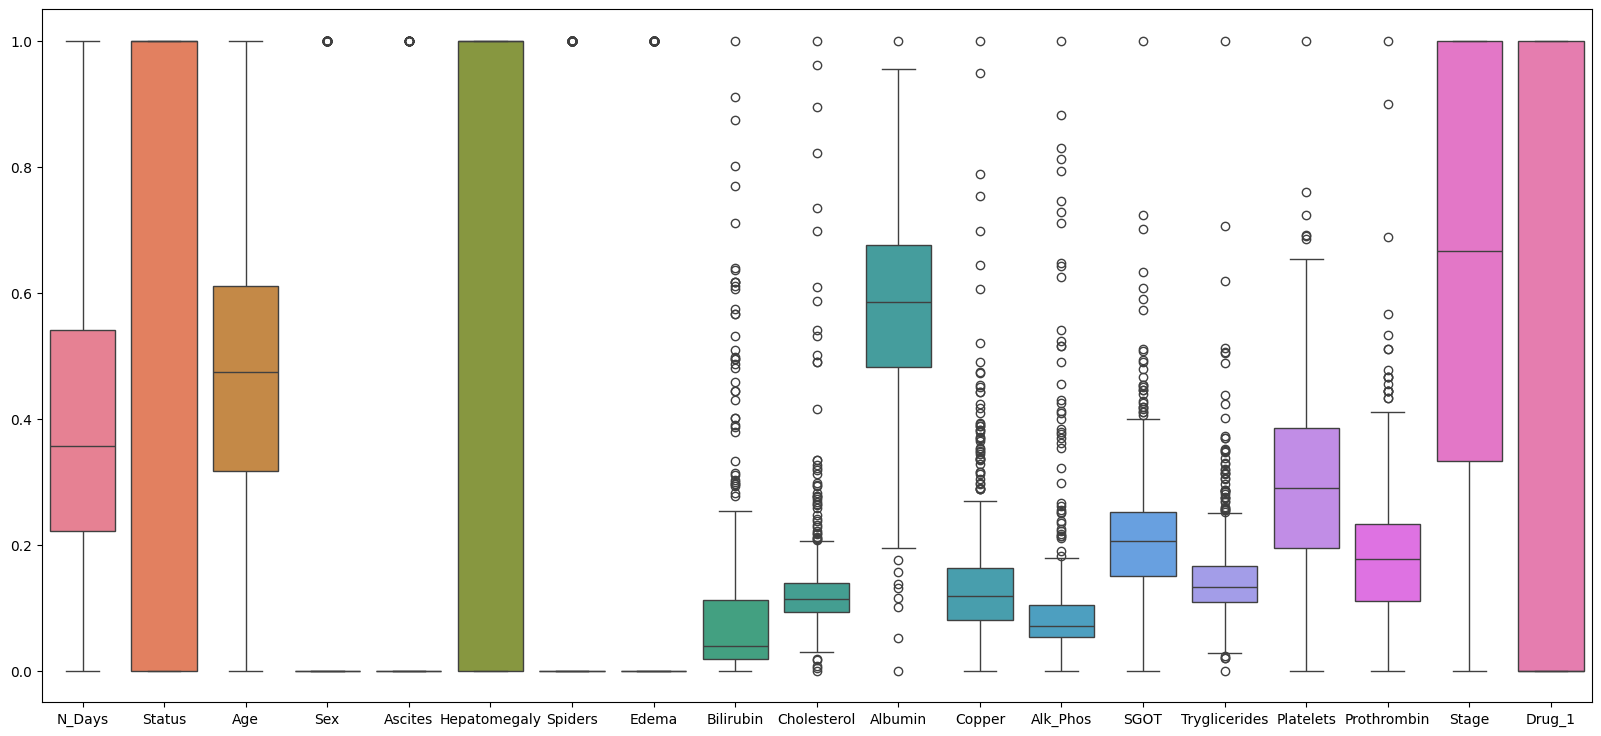

In [75]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

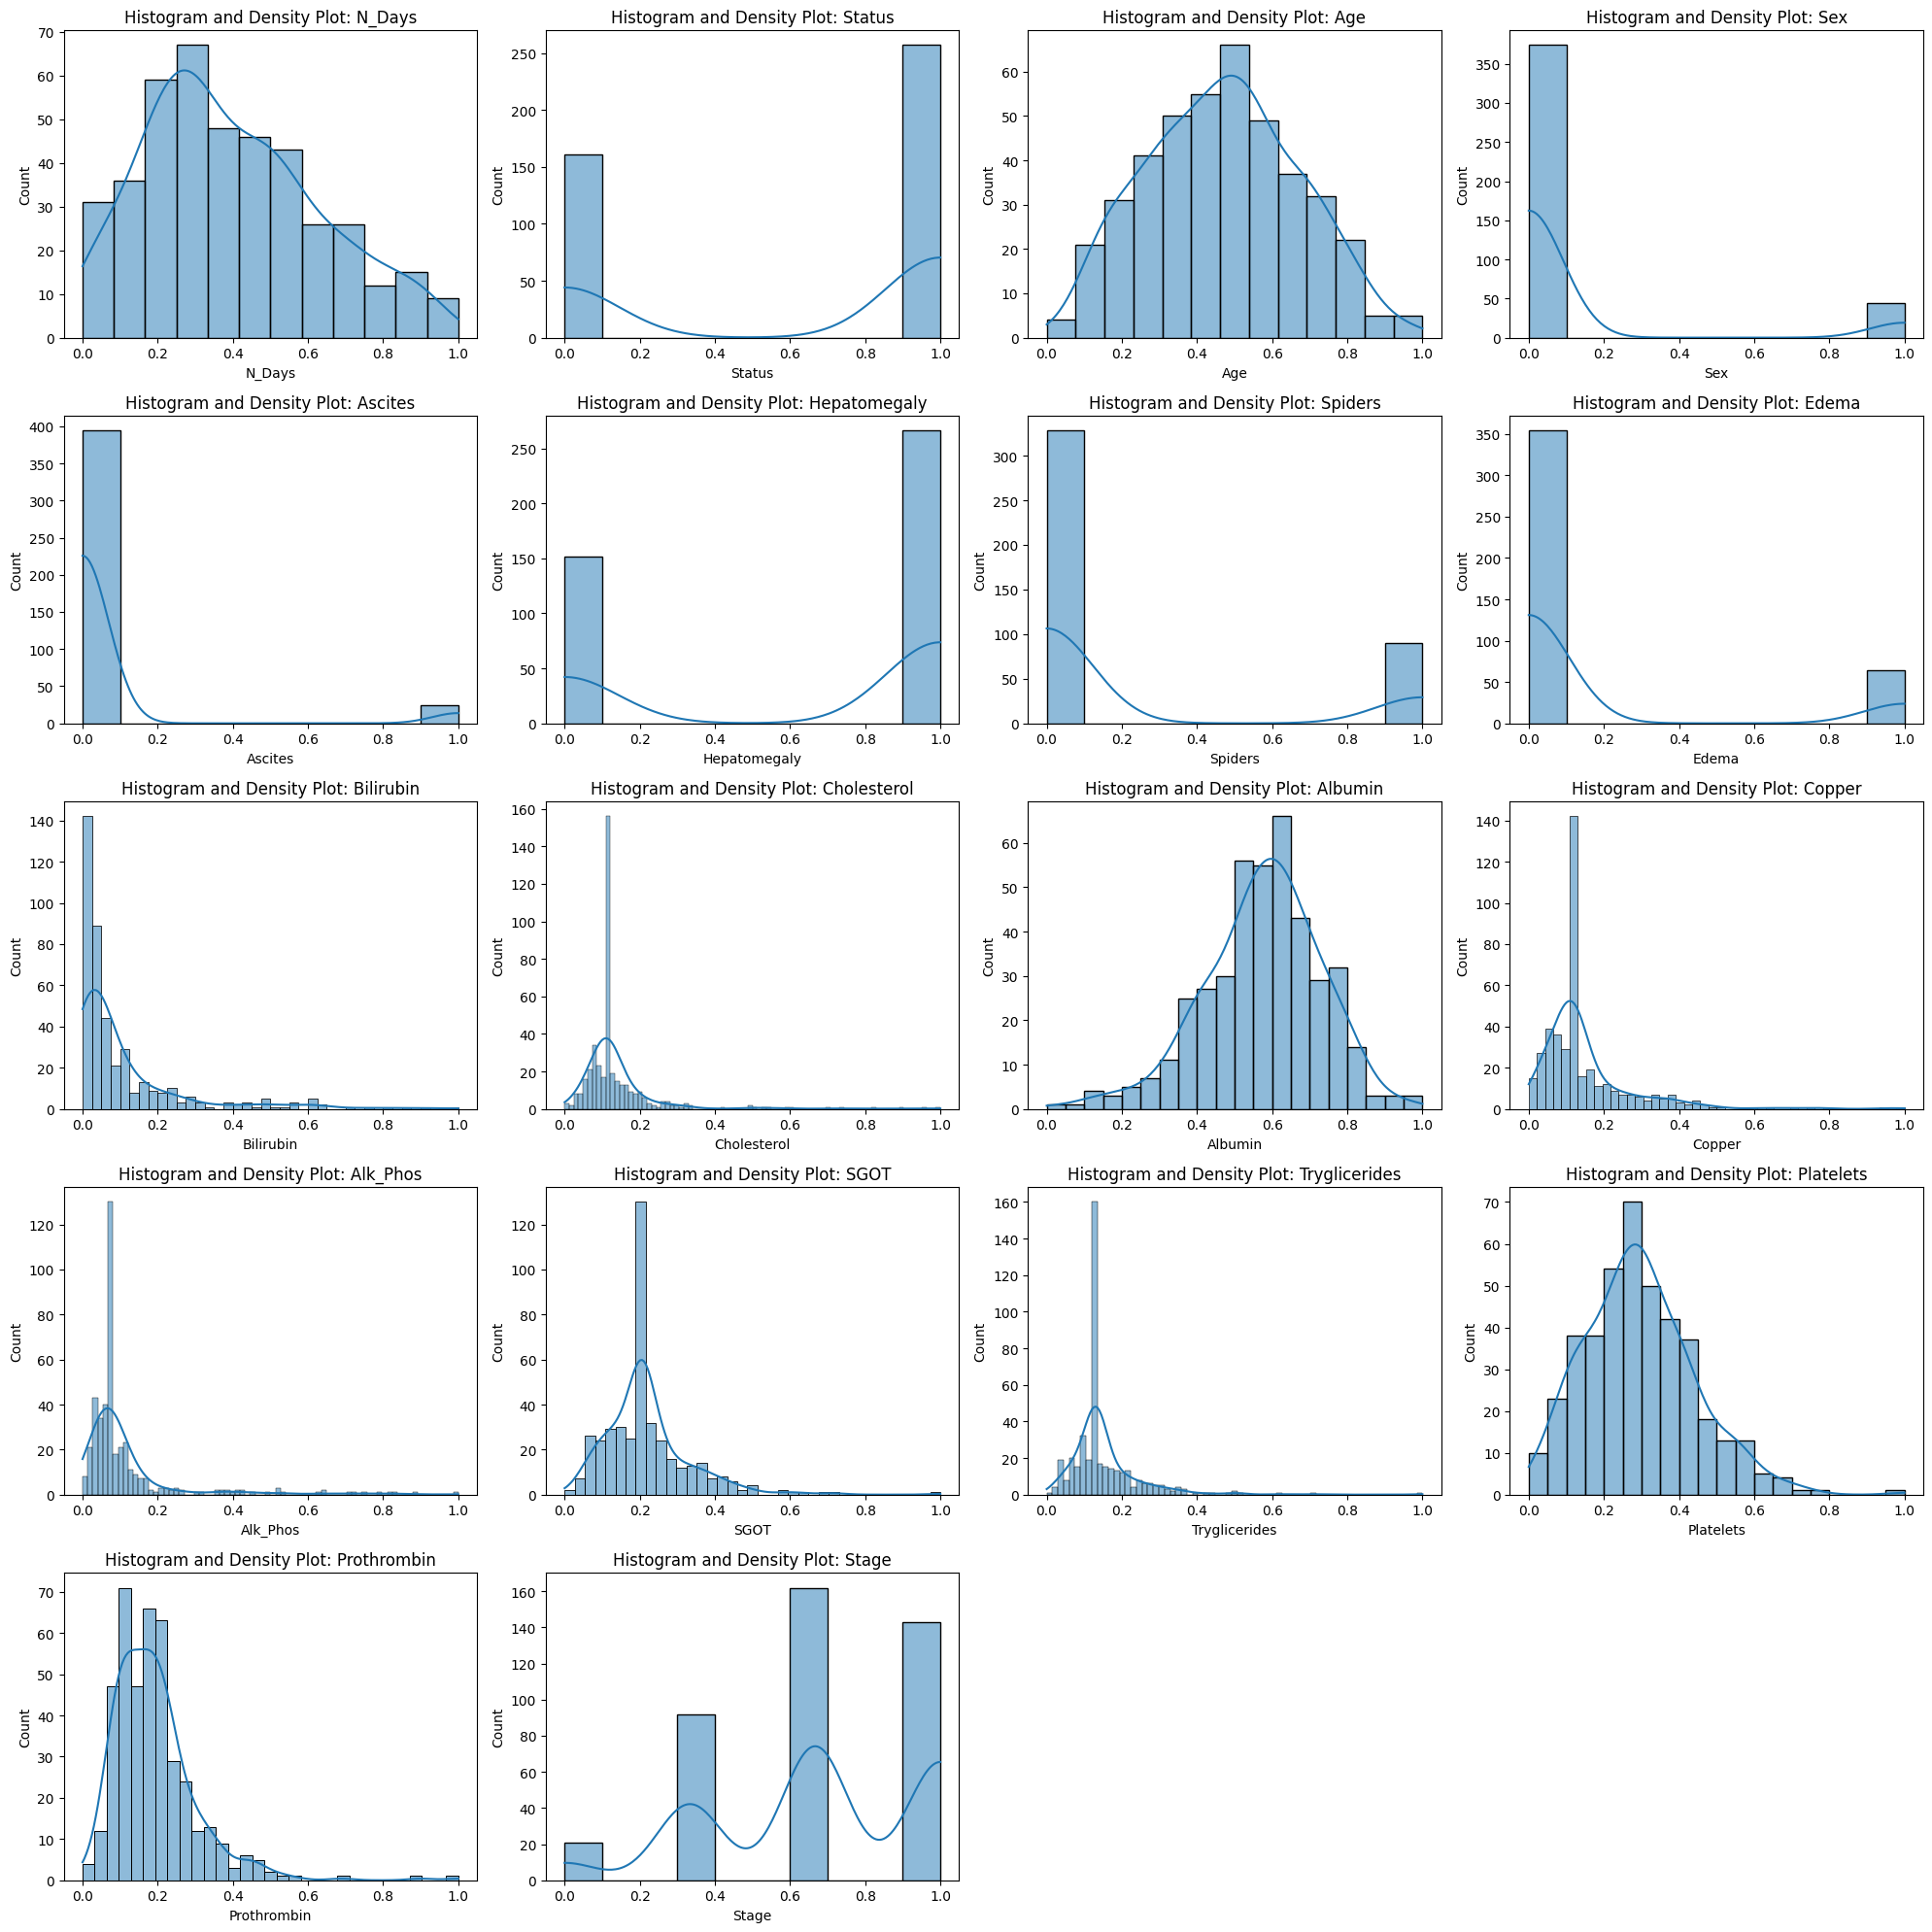

In [76]:
# Plotting histograms and density plots for all numeric variables

# Filtering out the numeric variables for the density plot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Adjust grid size to 5x4 for 17 numeric columns (or more, if needed)
plt.figure(figsize=(20, 20))  # You might need to adjust figure size as well

for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjusted to 5x4 grid
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram and Density Plot: {column}')

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

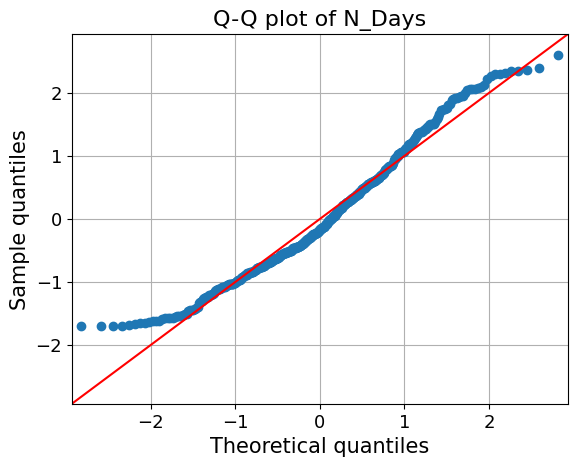

<Figure size 800x500 with 0 Axes>

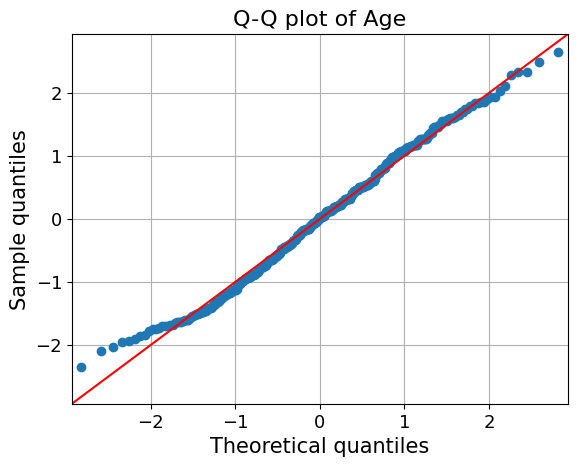

<Figure size 800x500 with 0 Axes>

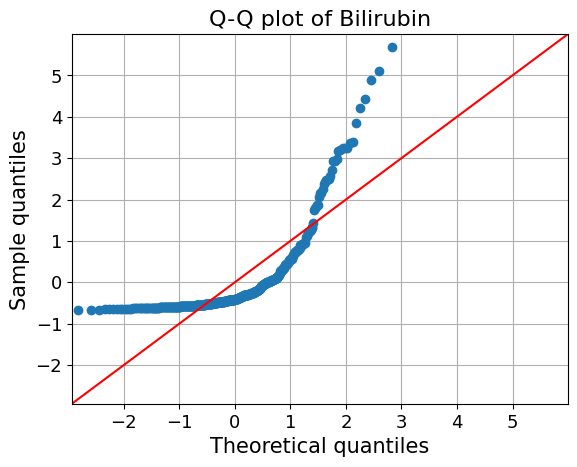

<Figure size 800x500 with 0 Axes>

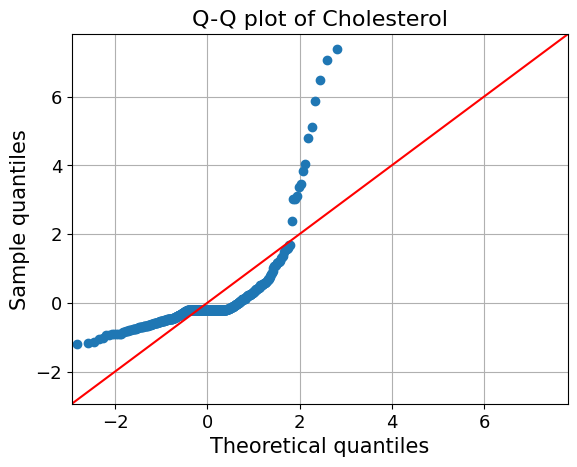

<Figure size 800x500 with 0 Axes>

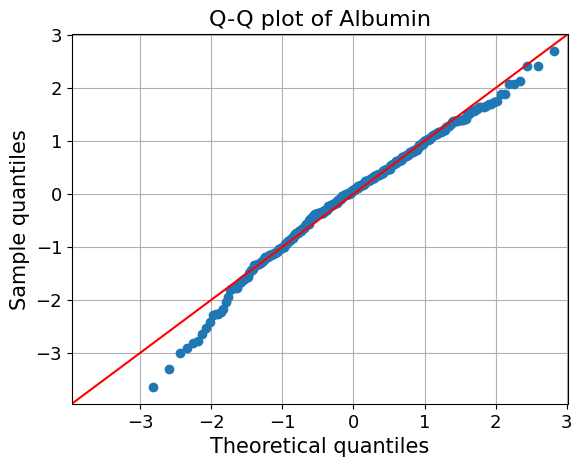

<Figure size 800x500 with 0 Axes>

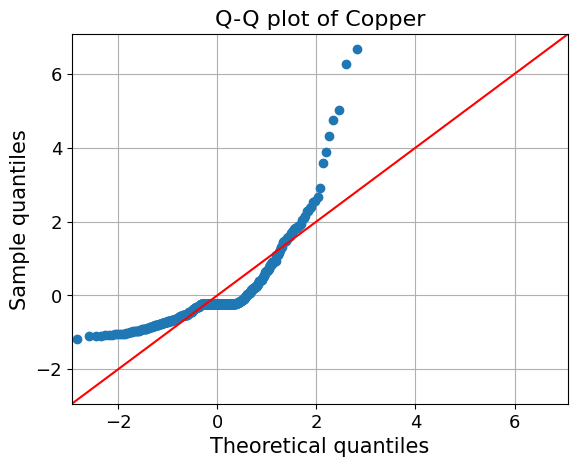

<Figure size 800x500 with 0 Axes>

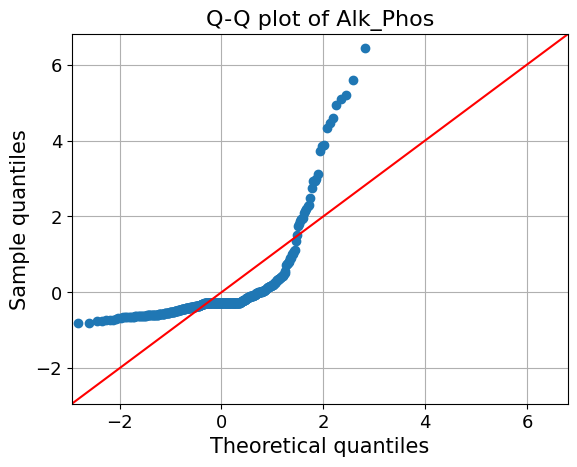

<Figure size 800x500 with 0 Axes>

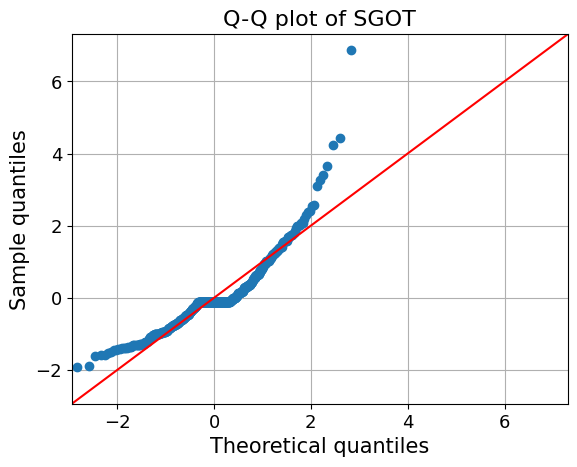

<Figure size 800x500 with 0 Axes>

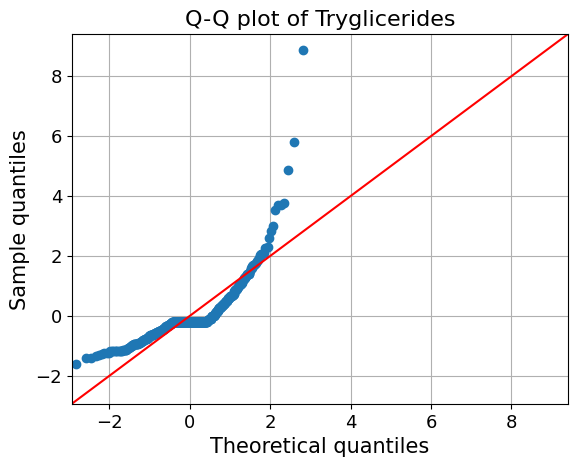

<Figure size 800x500 with 0 Axes>

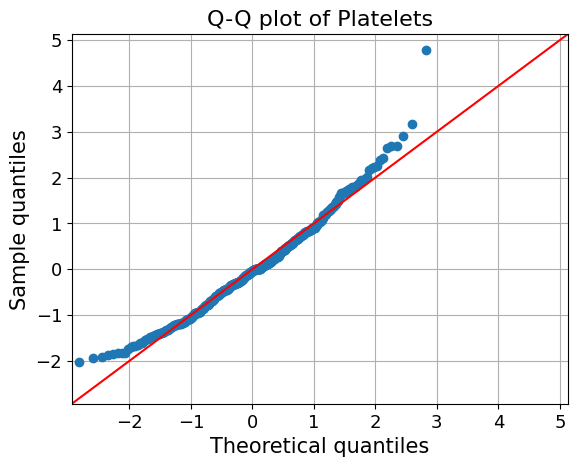

<Figure size 800x500 with 0 Axes>

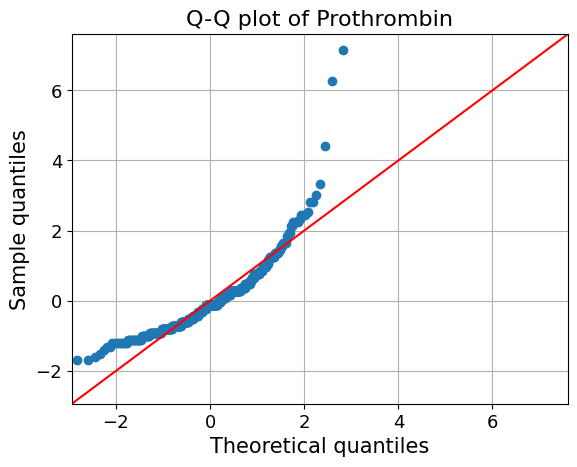

In [77]:
from statsmodels.graphics.gofplots import qqplot

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Generate Q-Q plots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data[var], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {var}', fontsize=16)
    plt.grid(True)
    plt.show()


<Axes: >

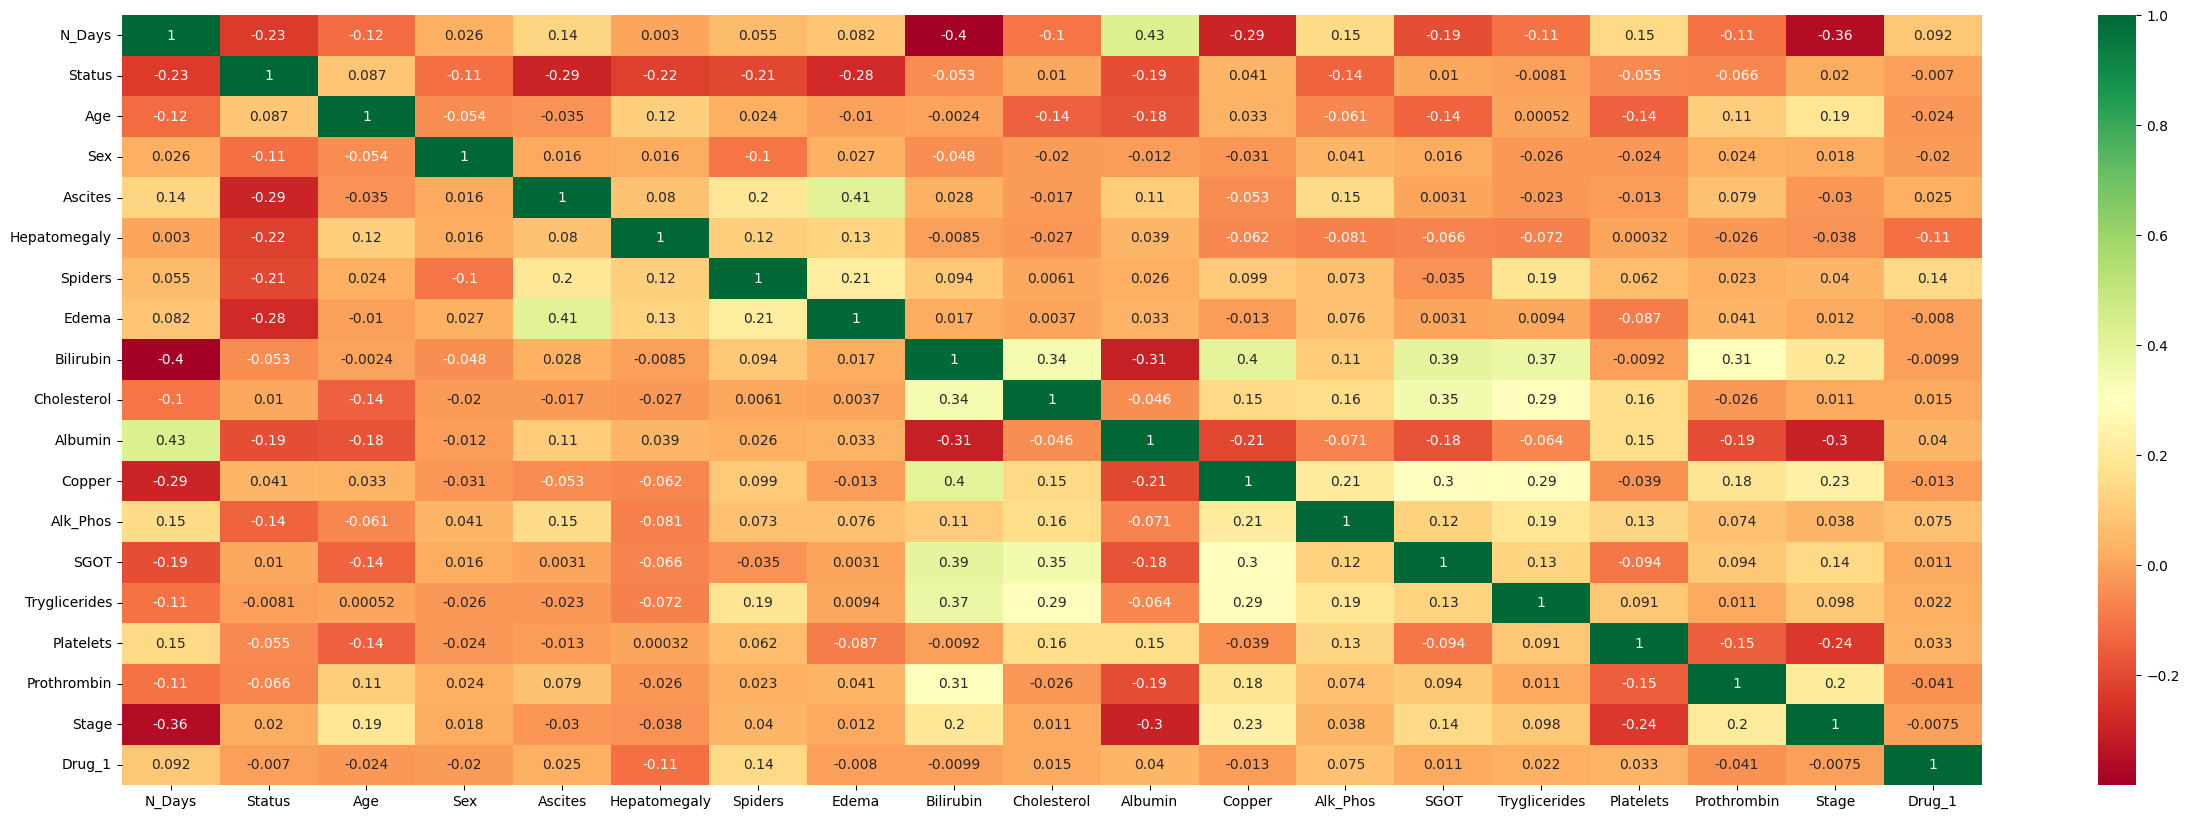

In [78]:
# the heat map of the correlation
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

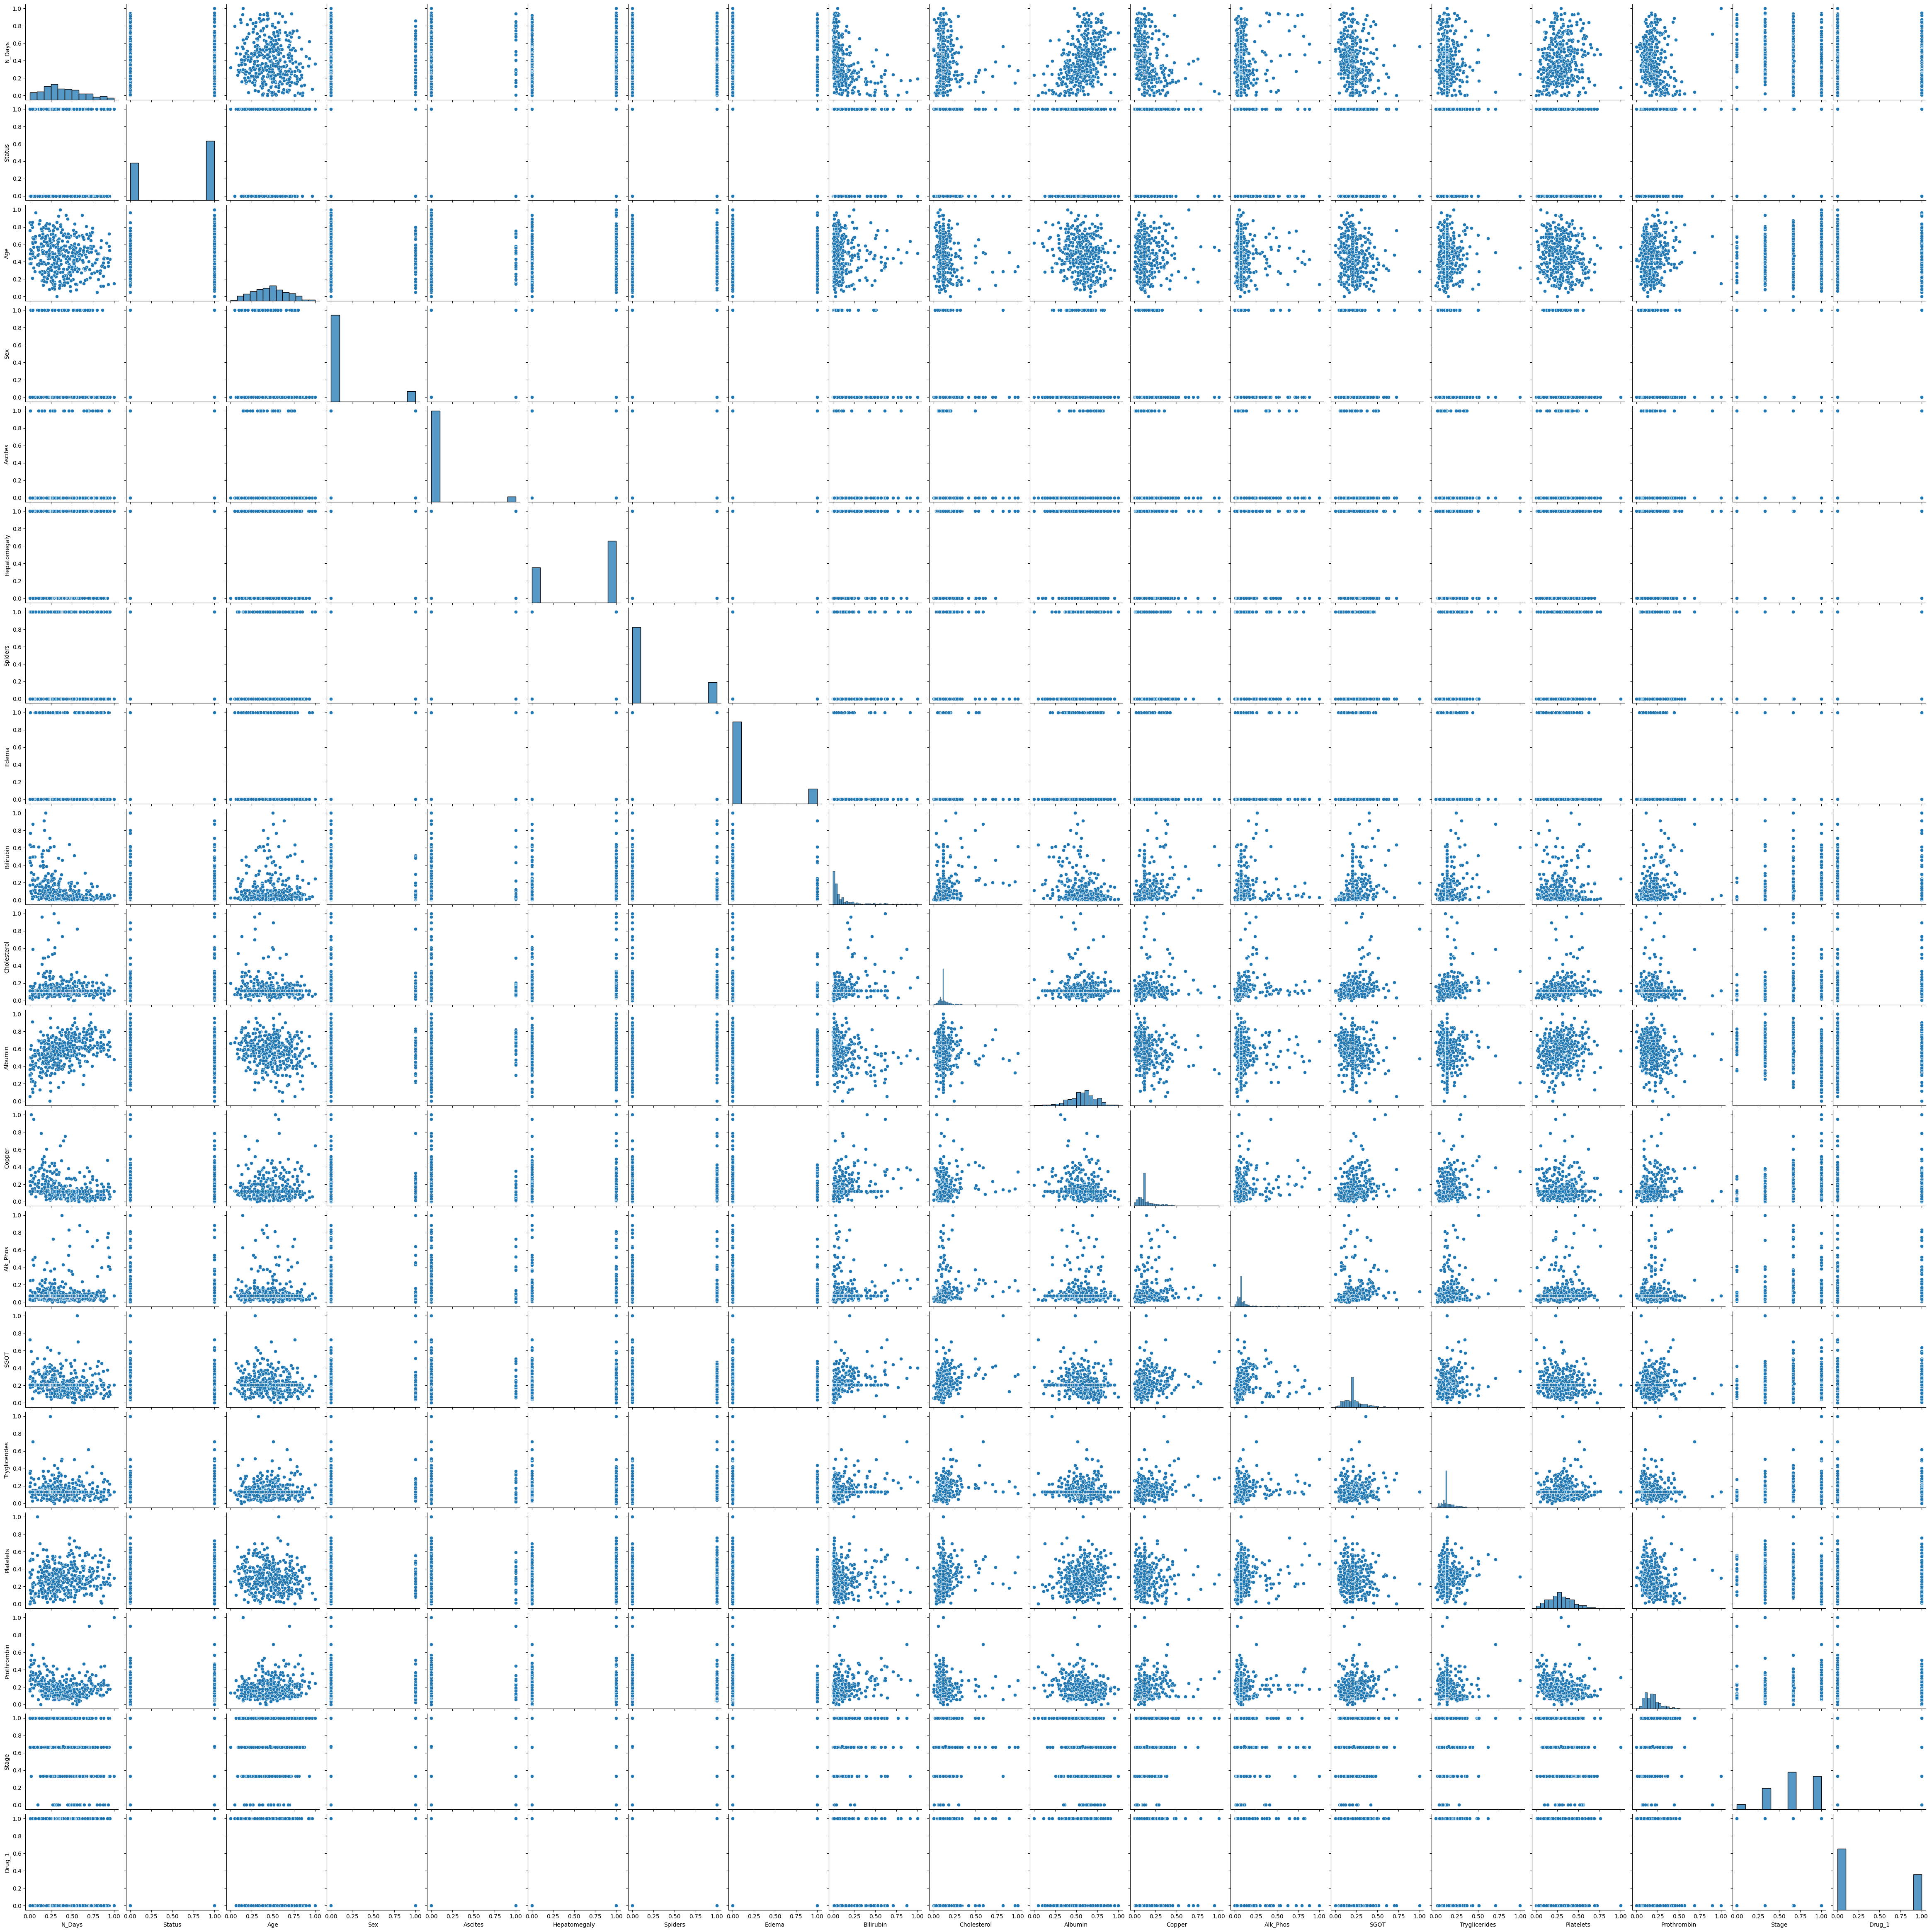

In [59]:
# pair plot to check the colinearity
sns.pairplot(data)